# dummy variables assignment

assigning values to categorical variabels

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [6]:
lgd=pd.read_csv('LGD_DATA.csv')
lgd.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
0,150024,24,5,1,M,Married,203.319595
1,144880,31,10,1,F,Single,402.197302
2,133742,56,37,1,M,Married,553.132096
3,151282,52,31,1,F,Married,292.430579
4,174407,20,3,1,M,Single,246.540576


In [7]:
lgd_new=pd.get_dummies(lgd,drop_first=True)

In [8]:
lgd_new.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands,Gender_M,Married_Single
0,150024,24,5,1,203.319595,1,0
1,144880,31,10,1,402.197302,0,1
2,133742,56,37,1,553.132096,1,0
3,151282,52,31,1,292.430579,0,0
4,174407,20,3,1,246.540576,1,1


In [12]:
linreg1=LinearRegression() #prepare LR object
linreg1.fit(lgd_new.iloc[:,[1,2,3,5,6]],lgd_new['Losses in Thousands'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
linreg1.coef_

array([ -3.80823766,  -2.43254505,  -2.69086413,  93.8563901 ,
       134.99809835])

In [14]:
linreg1.intercept_

502.9204833236437

In [32]:
lgd_new['predicted loss in thousands']=linreg1.predict(pd.DataFrame(lgd_new.iloc[:,[1,2,3,5,6]])) #it should always be independent variables
lgd_new.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands,Gender_M,Married_Single,predicted loss in thousands
0,150024,24,5,1,203.319595,1,0,490.525580
1,144880,31,10,1,402.197302,0,1,492.846900
2,133742,56,37,1,553.132096,1,0,290.820534
3,151282,52,31,1,292.430579,0,0,226.792364
4,174407,20,3,1,246.540576,1,1,645.621719


In [15]:
tss=sum((lgd_new['Losses in Thousands']-np.mean(lgd_new['Losses in Thousands']))**2)
tss

984284800.0314227

In [22]:
sse=((lgd_new['Losses in Thousands']-lgd_new['predicted loss in thousands'])**2).sum()
sse

687046053.0556386

In [23]:
R2=1-(sse/tss)
R2

0.3019844936813969

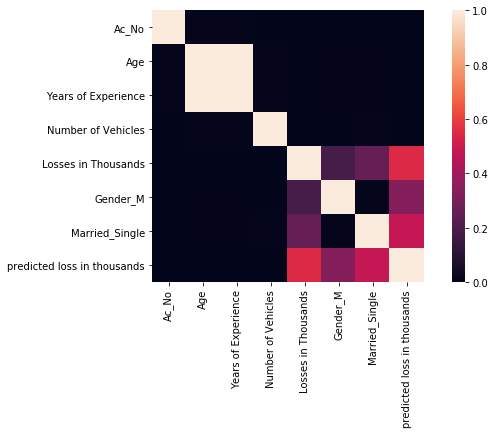

In [25]:
corrmat=lgd_new.corr()
f,ax=plt.subplots(figsize=(10,5))
sns.heatmap(corrmat,vmin=0,vmax=1,square=True)
plt.show()